# 概要

SVMでの最適化の目的は、マージンを最大化すること。<br>
マージンとは。超平面とその超平面に最も近いトレーニングサンプルの間の距離として定義される
図解すると下記になる

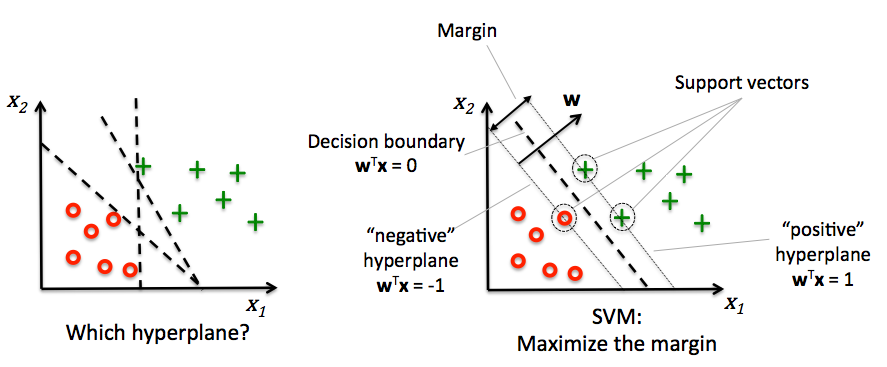

In [2]:
from IPython.display import Image
Image(filename='./images/03_07.png', width=500) 

# 実装

slearn.svmは、LIBSVMを使った実装でこれは高速に行えるが、データセットが大きすぎる場合コンピュータのメモリに収まらないことがある
SGClassifierメソッドは確率勾配降下法と同じようになる

## sklearnを使った実装

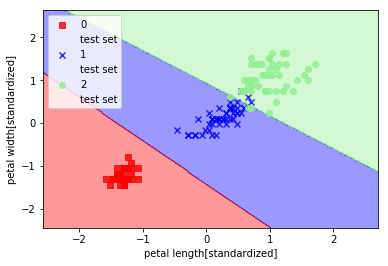

In [7]:
from sklearn.svm import SVC
#線形SVMのインスタンスを生成
svm = SVC(kernel='linear',C=1.0,random_state=0)
#線形SVMのモデルにトレーニングデータを適合させる
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
plt.legend(loc='upper left')
plt.show()

In [10]:
y_pred = svm.predict(X_test_std)
print('miss classified Count:%d' % (y_test != y_pred).sum())

miss classified Count:1


## SGDClassifierを使った実装

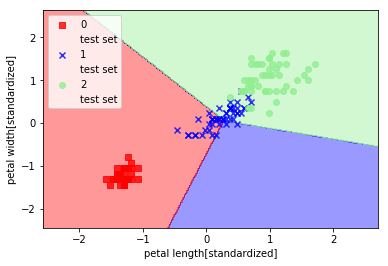

In [9]:
from sklearn.linear_model import SGDClassifier
#線形SVMのインスタンスを生成
sgd_svm = SGDClassifier(loss='hinge')
#線形SVMのモデルにトレーニングデータを適合させる
sgd_svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=sgd_svm,test_idx=range(105,150))
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
plt.legend(loc='upper left')
plt.show()

In [11]:
y_pred = sgd_svm.predict(X_test_std)
print('miss classified Count:%d' % (y_test != y_pred).sum())

miss classified Count:16


# カーネル化

カーネル化は、下図のように射影関数を使って線形分離できないデータセットを高次元空間に射影し線形分離可能とする<br>
しかし、高次元のデータを扱っている場合計算コストは高くなるため、カーネルトリックを用いる<br>
 $k(x^{(i)},x^{(j)})=\phi(x^{(i)})^T\phi(x^{(j)})$<br>
 一般的なカーネルトリックの1つは、動径基底関数カーネルである<br>
 $k(x^{(i)},x^{(j)})=exp(-\gamma\left|\left|x^{(i)}-x^{(j)}\right|\right|^2)$<br>
 また、$\gamma$は最適化されるハイパーパラメータである

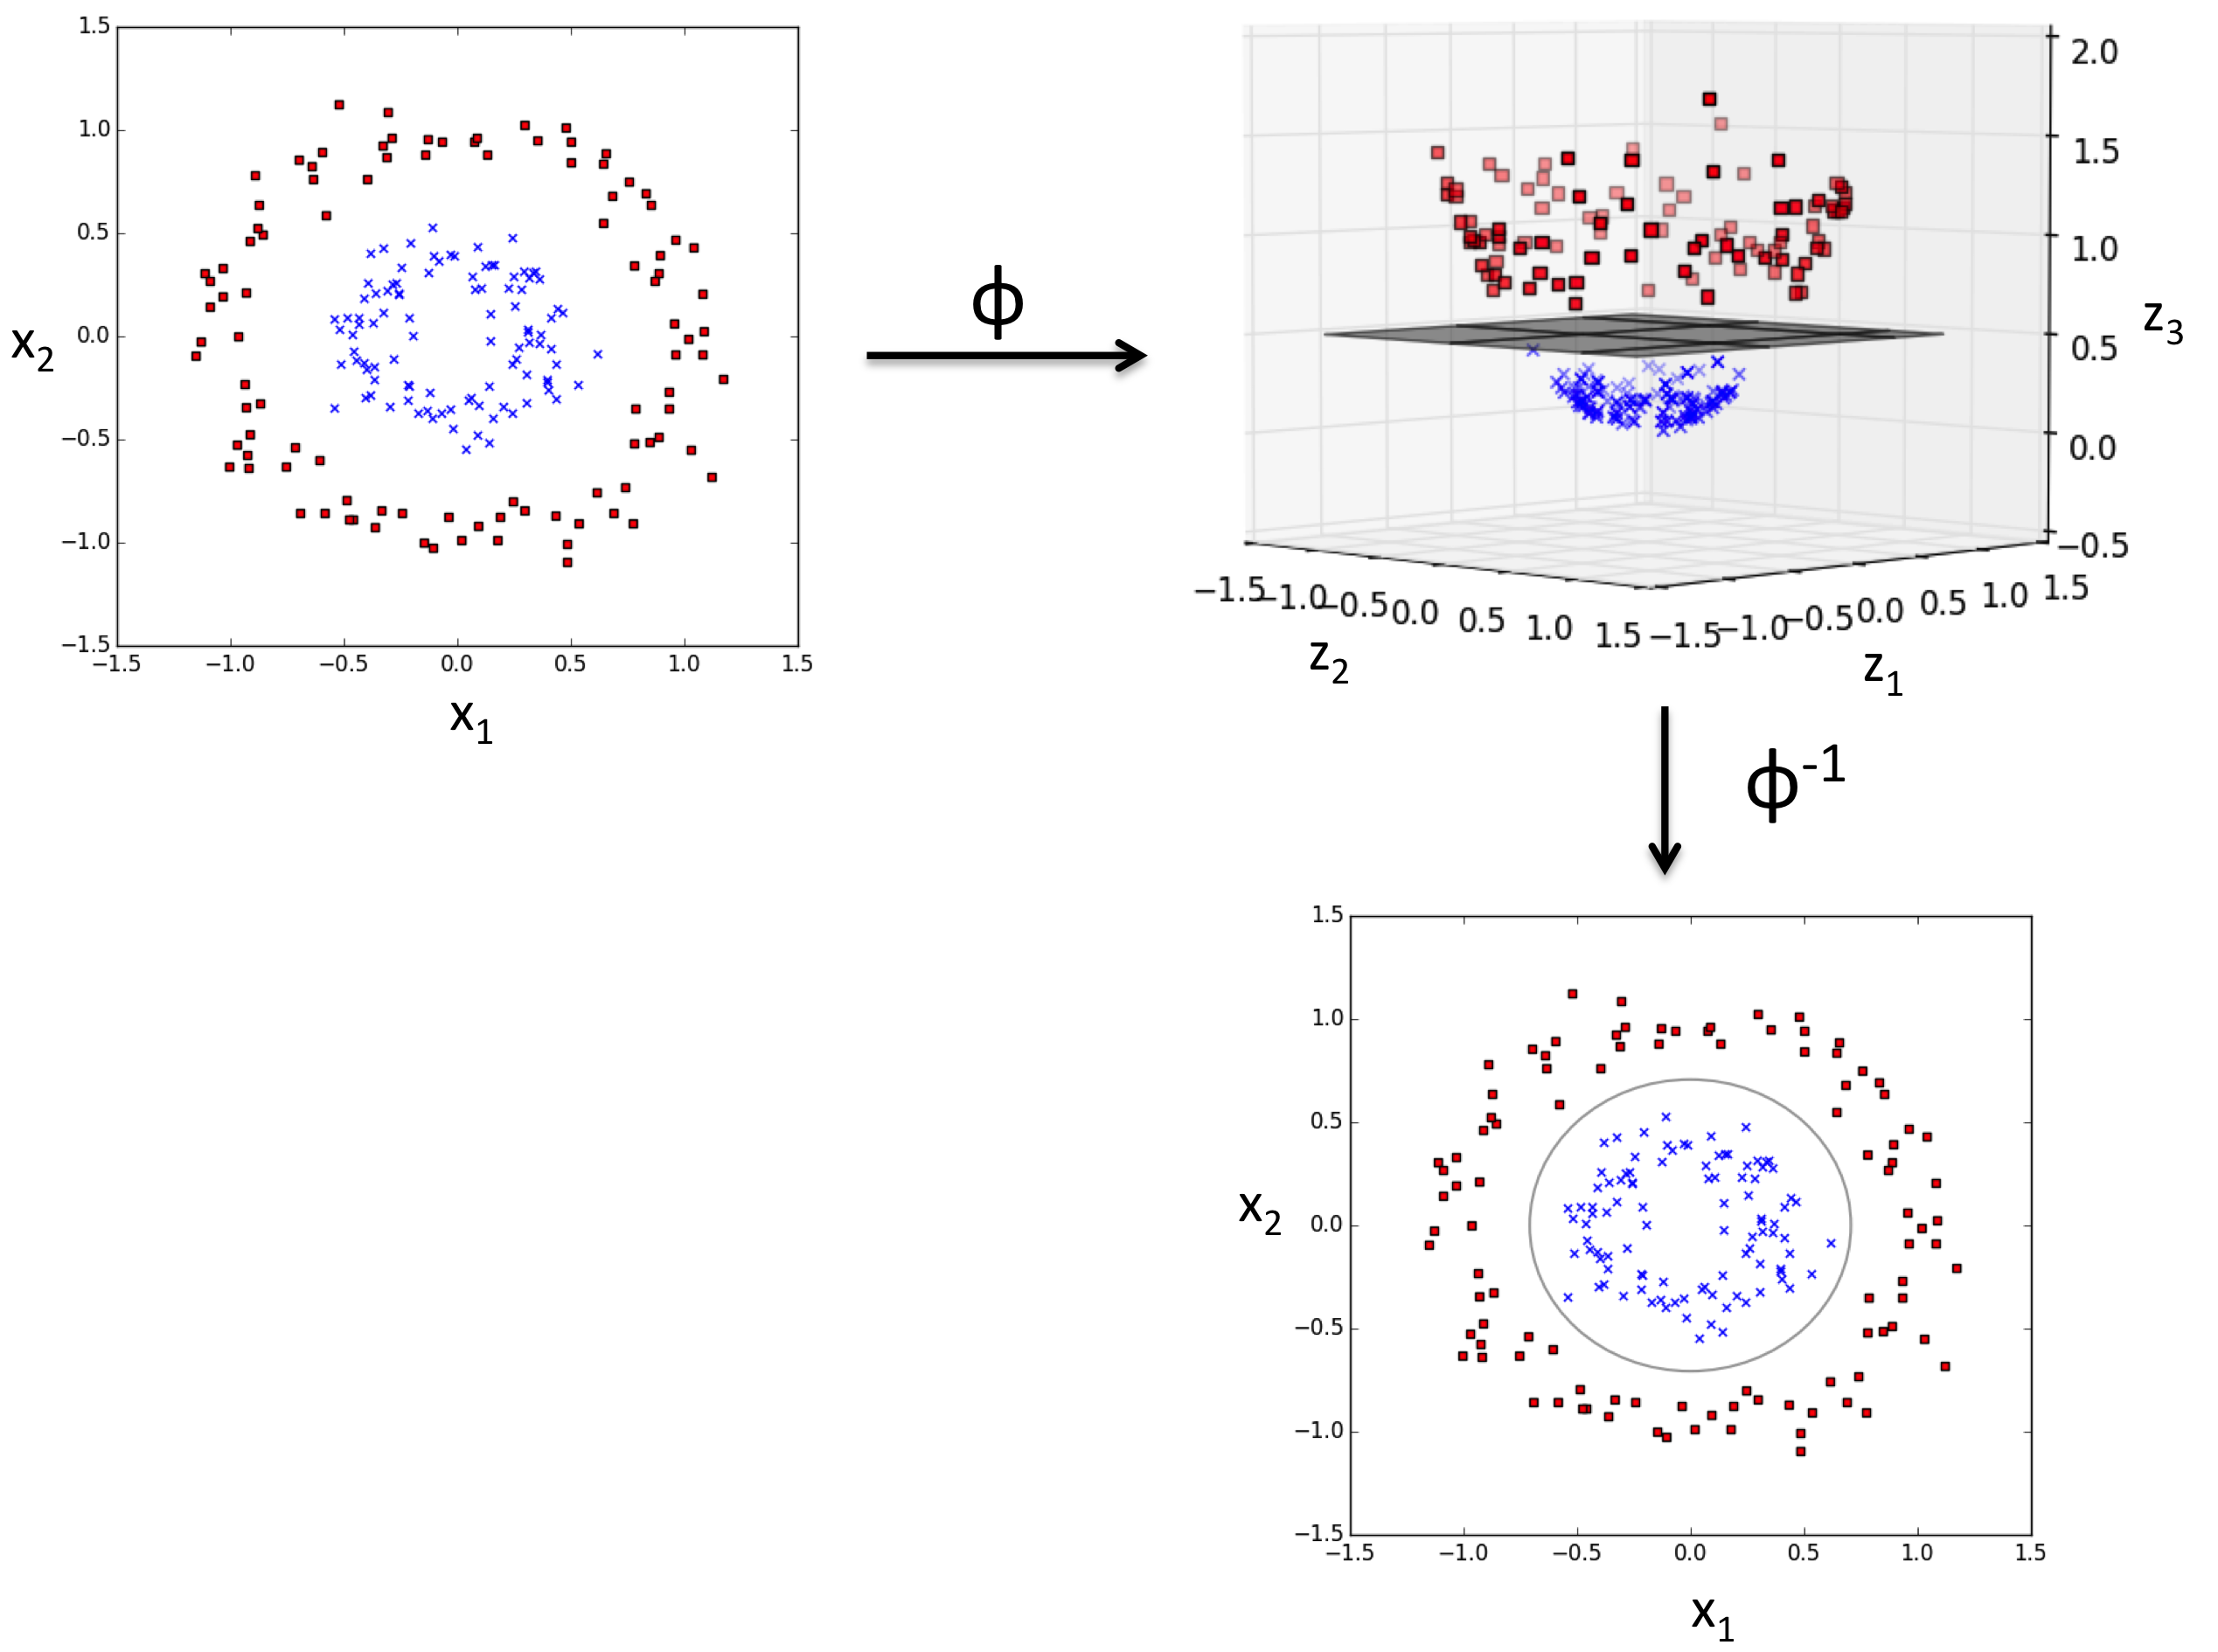

In [12]:
from IPython.display import Image
Image(filename='./images/03_11.png', width=500) 

## カーネルの実装

### データの生成

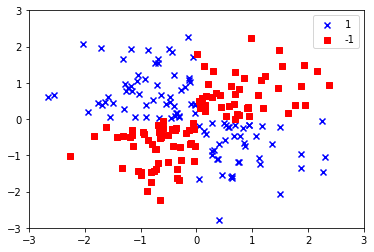

In [14]:
#乱数種を指定
np.random.seed(0)
#標準正規分布に従う乱数で200行2列の行列を生成
X_xor = np.random.randn(200,2)
#2つの引数に対して排他的論理和を実行
y_xor = np.logical_xor(X_xor[:,0] > 0,X_xor[:,1] > 0)
#排他的論理和の値が真の場合は1、儀の場合は-1を割り当てる
y_xor = np.where(y_xor,1,-1)
#ラベル1を青のxでプロット
plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],c='b',marker='x',label='1')
#ラベル-1を赤の四角でプロット
plt.scatter(X_xor[y_xor==-1,0],X_xor[y_xor==-1,1],c='r',marker='s',label='-1')
#軸の範囲を指定
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.show()

### データの学習と分類

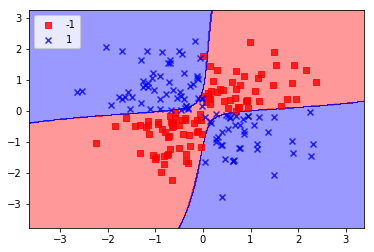

In [20]:
#RBFカーネルによるSVMのインスタンスを生成
svm = SVC(kernel='rbf',random_state=0,gamma=0.10,C=10.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.legend(loc='upper left')
plt.show()

### $\gamma$によるデータ分類の変化

$\gamma$パラメータを大きな値とするとクラス0とクラス1のまわりの決定境界がかなり複雑になる

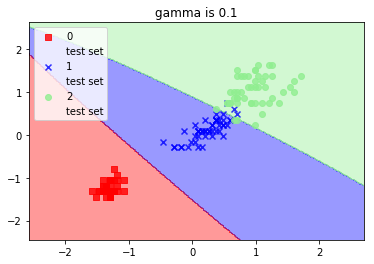

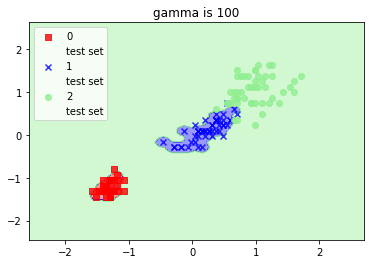

In [31]:
svm_gamma_small = SVC(kernel='rbf',random_state=0,gamma=0.1,C=1.0)
svm_gamma_small.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm_gamma_small,test_idx=range(105,150))
plt.title('gamma is 0.1')
plt.legend(loc='upper left')
plt.show()

svm_gamma_large = SVC(kernel='rbf',random_state=0,gamma=100.0,C=1.0)
svm_gamma_large.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm_gamma_large,test_idx=range(105,150))
plt.title('gamma is 100')
plt.legend(loc='upper left')
plt.show()


# その他関数


In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    #マーカとカラーマップの準備
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域をプロット
    x1_min,x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1,X[:,1].max() + 1
    
    #グリッドポイントの生成
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution), \
                         np.arange(x2_min,x2_max,resolution))
    
    #各特徴量を1智元配列に変換して予測を実行
    Z= classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    
    #予測結果をもとのグリッドポイントのデータベースに変換
    Z = Z.reshape(xx1.shape)
    
    #グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    
    #軸の範囲の設定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #クラスごとにサンプルをプロット
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],y=X[y == cl,1], \
                   alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)
    
    #テストサンプルを目出させる（展を●で表示）
        if test_idx:
            X_test,y_test = X[test_idx,:],y[test_idx]
            plt.scatter(X_test[:,0],X_test[:,1],c='', \
                        alpha=1.0,linewidths=1,marker='o',s=55,label='test set')

In [22]:
#テストデータとトレインデータの分類
#sklearnで用意されている関数を使って分類する
from sklearn import datasets
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

#Irisデータセットをロード
iris = datasets.load_iris()

#3列目4列目の特徴量を抽出
X = iris.data[:,[2,3]]
#クラスラベルを取得
y = iris.target

#トレーニングデータとテストデータに分類
#sklearnで用意されている関数を使って分離する
#全体の30%をテストデータにする
X_train,X_test,y_train,y_test = train_test_split(\
                                                X,y,test_size=0.3,random_state=0)

#StandardScalerをつかって、トレーニングデータを標準化
sc = StandardScaler()
#トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)
#平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#トレーニングデータとテストデータの特徴量を行報告に結合
X_combined_std = np.vstack((X_train_std,X_test_std))
#トレーニングデータとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train,y_test))

